In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

from scripts.analysis import data, plot

W, H = 5.5, 2.5
plot.init_matplotlib()

def pad_missing_months(ts: pd.Series) -> pd.Series:
    start, end = ts.index[0], ts.index[-1]
    all_months = map(
        lambda month: month.strftime("%Y-%m"),
        pd.date_range(start=start, end=end, freq="MS"),
    )
    return ts.reindex(all_months, fill_value=0)

In [2]:
repos = data.get_fake_star_repos()
stars = data.get_fake_stars_by_month()
repos_with_campaign = data.get_repos_with_campaign()
repos = repos[repos.repo_name.isin(repos_with_campaign)]
npm_github, npm_downloads = data.get_fake_npm_pkgs_and_downloads()
pypi_github, pypi_downloads = data.get_fake_pypi_pkgs_and_downloads()

In [3]:
print(f"{npm_github.github.nunique()} npm repos, {pypi_github.github.nunique()} pypi repos")
print(f"total npm downloads: {npm_downloads.download_count.sum()}, total pypi downloads: {pypi_downloads.download_count.sum()}")

21 npm repos, 43 pypi repos
total npm downloads: 2720186, total pypi downloads: 560643


In [4]:
npm_downloads.groupby("name").sum().describe()

,download_count
count,4.000000e+01
mean,6.800465e+04
std,1.914755e+05
min,1.320000e+02
25%,5.862500e+02
50%,4.979500e+03
75%,3.273675e+04
max,1.088452e+06


In [9]:
npm_downloads.groupby("name").sum()

,month,download_count
name,,
@aboutyou/backbone,2019-012019-022019-032019-042019-052019-062019...,531311
@baslund/nestjs-seq,2022-082022-092022-102022-112022-122023-012023...,707
@cakoyo/hardhat-zksync-solc,2022-032022-042022-052022-062022-072022-082022...,139
@connoropolous/holochain-client,2022-072022-082022-092022-102022-112022-122023...,167
@dzlzv/hydra-cli,2020-082020-092020-102020-112020-122021-012021...,71188
@dzlzv/hydra-indexer-lib,2020-082020-092020-102020-112020-122021-012021...,37902
@eartho/one-client-js,2022-052022-062022-072022-082022-092022-102022...,5672
@holo-host/web-sdk,2020-042020-052020-062020-072020-082020-092020...,9668
@holochain-open-dev/create,2022-022022-032022-042022-052022-062022-072022...,302


In [8]:
pypi_downloads.groupby("name").sum().describe()

,download_count
count,42.000000
mean,13348.642857
std,26800.202746
min,94.000000
25%,953.750000
50%,3745.500000
75%,10616.250000
max,153042.000000


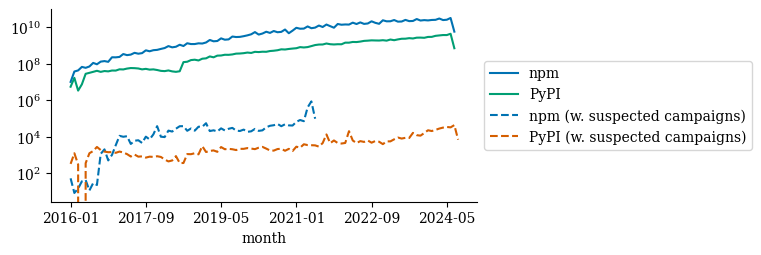

In [5]:
all_npm_downloads = data.get_npm_downloads()
all_npm_downloads["month"] = all_npm_downloads.date.map(lambda x: x[:7])
all_npm_downloads = (
    all_npm_downloads.groupby(["name", "month"]).download_count.sum().reset_index()
)
all_pypi_github, all_pypi_downloads = data.get_pypi_pkgs_and_downloads()

fig, ax = plt.subplots(figsize=(W, H))
all_npm_downloads.groupby("month").download_count.sum().plot(
    ax=ax, label="npm", color="C0"
)
all_pypi_downloads.groupby("month").download_count.sum().plot(
    ax=ax, label="PyPI", color="C1"
)
pad_missing_months(npm_downloads.groupby("month").download_count.sum()).plot(
    ax=ax, label="npm (w. suspected campaigns)", color="C0", linestyle="--"
)
pad_missing_months(pypi_downloads.groupby("month").download_count.sum()).plot(
    ax=ax, label="PyPI (w. suspected campaigns)", color="C2", linestyle="--"
)
ax.set_yscale("log")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plot.remove_spines(ax)

In [6]:
npm_packages_to_dependents = {}
pypi_packages_to_dependents = {}
for pkg in npm_github.name.unique():
    url = f"https://packages.ecosyste.ms/api/v1/registries/npmjs.org/packages/{pkg}"
    res = requests.get(url)
    if res.status_code == 200:
        data = res.json()
        npm_packages_to_dependents[pkg] = data["dependent_packages_count"]
    else:
        print(f"failed to get dependents for {pkg}")
for pkg in pypi_github.name.unique():
    url = f"https://packages.ecosyste.ms/api/v1/registries/pypi.org/packages/{pkg}"
    res = requests.get(url)
    if res.status_code == 200:
        data = res.json()
        pypi_packages_to_dependents[pkg] = data["dependent_packages_count"]
    else:
        print(f"failed to get dependents for {pkg}")
pd.Series(npm_packages_to_dependents).describe()

failed to get dependents for ali-express-craper


count    47.000000
mean      7.042553
std      15.336738
min       0.000000
25%       1.000000
50%       2.000000
75%       4.000000
max      67.000000
dtype: float64

In [7]:
pd.Series(pypi_packages_to_dependents).describe()

count    64.00000
mean      0.37500
std       1.58865
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max      12.00000
dtype: float64